<a href="https://colab.research.google.com/github/armandossrecife/lp20231/blob/main/analise_alugueis_rj_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados de alugueis (Rio de Janeiro - 2020)

## Importando os dados

In [4]:
!wget https://raw.githubusercontent.com/armandossrecife/teste/main/icc/aluguel.csv

--2023-07-10 17:27:04--  https://raw.githubusercontent.com/armandossrecife/teste/main/icc/aluguel.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1634127 (1.6M) [text/plain]
Saving to: ‘aluguel.csv’

aluguel.csv         100%[===================>]   1.56M  --.-KB/s    in 0.06s   

2023-07-10 17:27:04 (26.4 MB/s) - ‘aluguel.csv’ saved [1634127/1634127]



## Criando o dataframe a partir do arquivo de dados

In [5]:
import pandas as pd

CSV (Coma Separated Value)

https://en.wikipedia.org/wiki/Comma-separated_values

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [16]:
df_aluguel = pd.read_csv('aluguel.csv', sep=';')
df_aluguel

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


## Explorando os dados importados

In [15]:
# Explorar os primeiros registros
df_aluguel.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [17]:
# Verificar informações básicas sobre os dados
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [68]:
# Verificar dados estatísticos básicos
df_aluguel.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,20371.000000,20371.000000,20371.000000,20371.000000,2.037100e+04,2.037100e+04,20371.000000
mean,1.893181,1.687301,0.753129,161.992931,7.245193e+03,2.447265e+03,1000.150459
std,1.436934,24.005939,1.066965,368.598830,2.697901e+04,4.640807e+04,5222.358127
min,0.000000,0.000000,0.000000,4.000000,8.400000e+01,1.000000e+00,1.000000
25%,0.000000,0.000000,0.000000,58.000000,1.600000e+03,6.400000e+02,105.000000
50%,2.000000,1.000000,0.000000,90.000000,3.000000e+03,1.068000e+03,240.000000
75%,3.000000,2.000000,1.000000,160.000000,6.130000e+03,1.900000e+03,618.000000
max,14.000000,1966.000000,7.000000,14730.000000,1.324640e+06,6.552570e+06,450625.000000


In [69]:
round(df_aluguel.describe(),2)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,20371.00,20371.00,20371.00,20371.00,20371.00,20371.00,20371.00
mean,1.89,1.69,0.75,161.99,7245.19,2447.26,1000.15
std,1.44,24.01,1.07,368.60,26979.01,46408.07,5222.36
min,0.00,0.00,0.00,4.00,84.00,1.00,1.00
25%,0.00,0.00,0.00,58.00,1600.00,640.00,105.00
50%,2.00,1.00,0.00,90.00,3000.00,1068.00,240.00
75%,3.00,2.00,1.00,160.00,6130.00,1900.00,618.00
max,14.00,1966.00,7.00,14730.00,1324640.00,6552570.00,450625.00


## Limpeza e Transformação de Dados

### Remover dados duplicados

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [18]:
# Remover dados duplicados
df_aluguel = df_aluguel.drop_duplicates()
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31800 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        31800 non-null  object 
 1   Bairro      31800 non-null  object 
 2   Quartos     31800 non-null  int64  
 3   Vagas       31800 non-null  int64  
 4   Suites      31800 non-null  int64  
 5   Area        31800 non-null  int64  
 6   Valor       31783 non-null  float64
 7   Condominio  27851 non-null  float64
 8   IPTU        21914 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.4+ MB


### Tratamento das colunas com valores ausentes - NaN (Nulos)

https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
https://pandas.pydata.org/docs/reference/api/pandas.notna.html#pandas.notna

In [19]:
df_aluguel.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [20]:
# Checa os valores "ausentes"
valor_null = df_aluguel['Valor'].isnull()
condominio_null = df_aluguel['Condominio'].isnull()
iptu_null = df_aluguel['IPTU'].isnull()

In [11]:
len(df_aluguel[valor_null])

17

In [21]:
len(df_aluguel[condominio_null])

3949

In [22]:
len(df_aluguel[iptu_null])

9886

Remove linhas que tenham valores "nulos"

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [24]:
# Lidar com valores ausentes
df_aluguel = df_aluguel.dropna()  # Remover linhas com valores ausentes
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20371 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        20371 non-null  object 
 1   Bairro      20371 non-null  object 
 2   Quartos     20371 non-null  int64  
 3   Vagas       20371 non-null  int64  
 4   Suites      20371 non-null  int64  
 5   Area        20371 non-null  int64  
 6   Valor       20371 non-null  float64
 7   Condominio  20371 non-null  float64
 8   IPTU        20371 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


## Informações básicas sobre o dataset de alugueis

### 1.Quais são os tipos de imóveis disponíveis?

unique()

https://pandas.pydata.org/docs/reference/api/pandas.unique.html

In [25]:
df_aluguel['Tipo'].unique()

array(['Quitinete', 'Conjunto Comercial/Sala', 'Apartamento', 'Flat',
       'Casa', 'Loja/Salão', 'Casa de Condomínio', 'Casa Comercial',
       'Casa de Vila', 'Loft', 'Loja Shopping/ Ct Comercial',
       'Galpão/Depósito/Armazém', 'Prédio Inteiro', 'Box/Garagem',
       'Studio', 'Terreno Padrão'], dtype=object)

In [26]:
len(df_aluguel['Tipo'].unique())

16

In [27]:
type(df_aluguel['Tipo'].unique())

numpy.ndarray

In [28]:
lista_tipos_imoveis = df_aluguel['Tipo'].unique().tolist()
lista_tipos_imoveis

['Quitinete',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Flat',
 'Casa',
 'Loja/Salão',
 'Casa de Condomínio',
 'Casa Comercial',
 'Casa de Vila',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Galpão/Depósito/Armazém',
 'Prédio Inteiro',
 'Box/Garagem',
 'Studio',
 'Terreno Padrão']

### 2.Quais são os bairros disponíveis?

In [29]:
df_aluguel['Bairro'].unique()

array(['Copacabana', 'Barra da Tijuca', 'Centro', 'Cachambi', 'Grajaú',
       'Lins de Vasconcelos', 'Freguesia (Jacarepaguá)', 'Tijuca',
       'Leblon', 'Ipanema', 'Jardim Oceânico', 'Humaitá',
       'Recreio dos Bandeirantes', 'Jardim Botânico', 'Península',
       'Méier', 'Vargem Pequena', 'Botafogo', 'Maracanã', 'Jacarepaguá',
       'São Conrado', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Todos os Santos', 'Itanhangá', 'Flamengo', 'Largo do Machado',
       'Catete', 'Jardim Carioca', 'Glória', 'Vila Isabel', 'Lagoa',
       'Taquara', 'Engenho Novo', 'Laranjeiras', 'Pilares', 'Arpoador',
       'Água Santa', 'Ilha do Governador', 'Jardim Sulacap',
       'Vila da Penha', 'Vargem Grande', 'São Cristóvão', 'Praça Seca',
       'Pechincha', 'Rio Comprido', 'Andaraí', 'Tanque', 'Leme',
       'Campo Grande', 'Pavuna', 'Curicica', 'Moneró',
       'São Francisco Xavier', 'Camorim', 'Urca', 'Praia da Bandeira',
       'Saúde', 'Anil', 'Santa Teresa', 'Bangu', 'Irajá', 'Fáti

In [30]:
len(df_aluguel['Bairro'].unique())

125

### 3.Quais são os valores mínimo e máximo dos alugueis válidos?

In [31]:
df_aluguel['Valor'].min()

84.0

In [33]:
df_aluguel['Valor'].max()

1324640.0

Analisar os valores que sejam muito altos. (Talvez precise remover da base de alugueis)

In [34]:
df_aluguel.query("Valor >= 1000000")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
21024,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
25632,Prédio Inteiro,Humaitá,0,96,0,8279,1324640.0,165580.0,96889.0


### 4.Informações de Apartamentos

In [35]:
df_aluguel_apartamentos = df_aluguel.query("Tipo == 'Apartamento'")
df_aluguel_apartamentos

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
...,...,...,...,...,...,...,...,...,...
32949,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0
32950,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


4.1 Qual o valor médio, min e max dos apartamentos?

In [36]:
df_aluguel_apartamentos.Valor.mean()

4875.494044960548

In [37]:
round(df_aluguel_apartamentos.Valor.mean(), 2)

4875.49

In [38]:
df_aluguel_apartamentos.Valor.min()

400.0

In [39]:
apartamento_aluguel_min = df_aluguel_apartamentos.Valor.min()
consulta_min = f"Valor == {apartamento_aluguel_min}"
df_aluguel_apartamentos.query(consulta_min)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
29511,Apartamento,Paciência,2,1,0,50,400.0,200.0,2.0


In [40]:
df_aluguel_apartamentos.Valor.max()

1250000.0

In [41]:
apartamento_aluguel_max = df_aluguel_apartamentos.Valor.max()
consulta_max = f"Valor == {apartamento_aluguel_max}"
df_aluguel_apartamentos.query(consulta_max)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
21024,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0


4.2 Apartamentos por Bairro

value_counts()

https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

In [42]:
df_aluguel_apartamentos['Bairro'].value_counts()

Barra da Tijuca             2482
Copacabana                  1829
Ipanema                     1329
Recreio dos Bandeirantes    1048
Leblon                       950
                            ... 
Tomás Coelho                   1
Jacaré                         1
Joá                            1
Catumbi                        1
Paciência                      1
Name: Bairro, Length: 111, dtype: int64

In [43]:
s_apartamentos_por_bairro = df_aluguel_apartamentos['Bairro'].value_counts()
s_apartamentos_por_bairro

Barra da Tijuca             2482
Copacabana                  1829
Ipanema                     1329
Recreio dos Bandeirantes    1048
Leblon                       950
                            ... 
Tomás Coelho                   1
Jacaré                         1
Joá                            1
Catumbi                        1
Paciência                      1
Name: Bairro, Length: 111, dtype: int64

In [44]:
s_apartamentos_por_bairro.index

Index(['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Recreio dos Bandeirantes',
       'Leblon', 'Tijuca', 'Botafogo', 'Flamengo', 'Lagoa',
       'Freguesia (Jacarepaguá)',
       ...
       'Cocotá', 'Jardim Sulacap', 'Guadalupe', 'Saúde', 'Vicente de Carvalho',
       'Tomás Coelho', 'Jacaré', 'Joá', 'Catumbi', 'Paciência'],
      dtype='object', length=111)

In [45]:
# Quantidade de apartamentos no Bairro de Copacabana
s_apartamentos_por_bairro['Copacabana']

1829

In [47]:
for i in range(111):
  bairro = s_apartamentos_por_bairro.index[i]
  qtd_apartamentos = s_apartamentos_por_bairro[bairro]
  print(f"Bairro: {bairro}: {qtd_apartamentos}")

Bairro: Barra da Tijuca: 2482
Bairro: Copacabana: 1829
Bairro: Ipanema: 1329
Bairro: Recreio dos Bandeirantes: 1048
Bairro: Leblon: 950
Bairro: Tijuca: 705
Bairro: Botafogo: 608
Bairro: Flamengo: 490
Bairro: Lagoa: 374
Bairro: Freguesia (Jacarepaguá): 293
Bairro: Laranjeiras: 282
Bairro: Vila Isabel: 206
Bairro: São Conrado: 187
Bairro: Méier: 170
Bairro: Jacarepaguá: 161
Bairro: Centro: 159
Bairro: Jardim Botânico: 157
Bairro: Leme: 150
Bairro: Gávea: 137
Bairro: Pechincha: 132
Bairro: Humaitá: 119
Bairro: Catete: 86
Bairro: Maracanã: 78
Bairro: Grajaú: 78
Bairro: Taquara: 78
Bairro: Cachambi: 74
Bairro: Andaraí: 61
Bairro: Engenho Novo: 59
Bairro: Glória: 57
Bairro: Santa Teresa: 53
Bairro: Rio Comprido: 47
Bairro: Praça Seca: 41
Bairro: Jardim Guanabara: 40
Bairro: Urca: 38
Bairro: Curicica: 38
Bairro: Engenho de Dentro: 36
Bairro: São Cristóvão: 35
Bairro: Lins de Vasconcelos: 33
Bairro: Anil: 33
Bairro: Península: 28
Bairro: Todos os Santos: 27
Bairro: Praça da Bandeira: 26
Bairro

O valor médio dos apartamentos **agrupados** por bairro

**groupby**: retorna um objeto GroupBy, agrupado por valores na coluna denominada "col".

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [48]:
df_aluguel_apartamentos[['Bairro', 'Valor']].sort_values(['Bairro'])

,Bairro,Valor
30407,Abolição,800.0
28488,Abolição,900.0
21523,Abolição,800.0
24298,Abolição,900.0
4857,Abolição,850.0
...,...,...
20939,Água Santa,950.0
676,Água Santa,800.0
20522,Água Santa,850.0
296,Água Santa,850.0


In [73]:
# Agrupar e resumir dados
df_agrupar_por_bairro = df_aluguel_apartamentos.groupby('Bairro').sum()
df_agrupar_por_bairro

<ipython-input-73-6baa9d13d4d1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agrupar_por_bairro = df_aluguel_apartamentos.groupby('Bairro').sum()


,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Bairro,,,,,,,
Abolição,11,3,0,303,5450.0,1876.0,117.0
Alto da Boa Vista,6,2,2,320,3450.0,2095.0,318.0
Andaraí,117,38,19,4219,85497.0,31550.0,4377.0
Anil,74,40,13,2655,51440.0,17998.0,8494.0
Arpoador,22,20,14,1664,101087.0,26227.0,6003.0
...,...,...,...,...,...,...,...
Vila Isabel,410,153,49,15395,316700.0,113433.0,18113.0
Vila Valqueire,45,18,9,1777,27550.0,6968.0,4099.0
Vila da Penha,21,7,4,786,12990.0,4058.0,890.0


In [81]:
dfgb_agrupar_bairro_valor = df_aluguel_apartamentos[['Bairro', 'Valor']].groupby(['Bairro'])
type(dfgb_agrupar_bairro_valor)

pandas.core.groupby.generic.DataFrameGroupBy

In [85]:
df_valor_medio_aluguel_por_bairro = dfgb_agrupar_bairro_valor.mean()
df_valor_medio_aluguel_por_bairro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, Abolição to Água Santa
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Valor   111 non-null    float64
dtypes: float64(1)
memory usage: 5.8+ KB


In [86]:
df_valor_medio_aluguel_por_bairro

,Valor
Bairro,
Abolição,908.333333
Alto da Boa Vista,1725.000000
Andaraí,1401.590164
Anil,1558.787879
Arpoador,11231.888889
...,...
Vila Isabel,1537.378641
Vila Valqueire,1530.555556
Vila da Penha,1299.000000


In [87]:
round(df_valor_medio_aluguel_por_bairro, 2)

,Valor
Bairro,
Abolição,908.33
Alto da Boa Vista,1725.00
Andaraí,1401.59
Anil,1558.79
Arpoador,11231.89
...,...
Vila Isabel,1537.38
Vila Valqueire,1530.56
Vila da Penha,1299.00


In [88]:
df_valor_medio_aluguel_por_bairro.index

Index(['Abolição', 'Alto da Boa Vista', 'Andaraí', 'Anil', 'Arpoador',
       'Bancários', 'Barra da Tijuca', 'Barra de Guaratiba', 'Benfica',
       'Bento Ribeiro',
       ...
       'Vargem Grande', 'Vargem Pequena', 'Vaz Lobo', 'Vicente de Carvalho',
       'Vidigal', 'Vila Isabel', 'Vila Valqueire', 'Vila da Penha', 'Zumbi',
       'Água Santa'],
      dtype='object', name='Bairro', length=111)

In [89]:
df_valor_medio_aluguel_por_bairro.loc['Leblon']

Valor    8541.138947
Name: Leblon, dtype: float64

In [90]:
round(df_valor_medio_aluguel_por_bairro.loc['Leblon'], 2)

Valor    8541.14
Name: Leblon, dtype: float64

In [57]:
df_valor_medio_aluguel_por_bairro.loc['Copacabana']

Valor    4520.436851
Name: Copacabana, dtype: float64

In [91]:
round(df_valor_medio_aluguel_por_bairro.loc['Copacabana'], 2)

Valor    4520.44
Name: Copacabana, dtype: float64

In [92]:
df_valor_medio_aluguel_por_bairro.loc['Barra da Tijuca']

Valor    5762.481064
Name: Barra da Tijuca, dtype: float64

In [93]:
round(df_valor_medio_aluguel_por_bairro.loc['Barra da Tijuca'], 2)

Valor    5762.48
Name: Barra da Tijuca, dtype: float64

In [94]:
df_aluguel_apartamentos.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


4.3 Quais os apartamentos do Bairro Barra da Tijuca, com 3 quartos que custam até R$ 3.000,00 de aluguel?

In [95]:
bairro='Barra da Tijuca'
quartos=3
valor=3000

In [96]:
consulta_apartamento = f"Bairro == '{bairro}' and Quartos=={quartos} and Valor<={valor}"
df_aluguel_apartamentos.query(consulta_apartamento)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
41,Apartamento,Barra da Tijuca,3,1,2,70,1800.0,1095.0,140.0
49,Apartamento,Barra da Tijuca,3,1,1,72,2350.0,600.0,70.0
90,Apartamento,Barra da Tijuca,3,2,1,104,2600.0,1364.0,406.0
97,Apartamento,Barra da Tijuca,3,2,2,85,2500.0,1400.0,190.0
158,Apartamento,Barra da Tijuca,3,2,1,128,3000.0,1384.0,324.0
...,...,...,...,...,...,...,...,...,...
31413,Apartamento,Barra da Tijuca,3,2,1,110,2800.0,1100.0,361.0
31489,Apartamento,Barra da Tijuca,3,2,1,141,3000.0,1425.0,372.0
32534,Apartamento,Barra da Tijuca,3,1,1,62,1600.0,750.0,171.0
32692,Apartamento,Barra da Tijuca,3,2,1,85,2500.0,800.0,233.0


4.4 Qual a distribuição de frequência dos valores de aluguel dos apartamentos da Barra da Tijuca variando até R$ 3.000,00?

<Axes: >

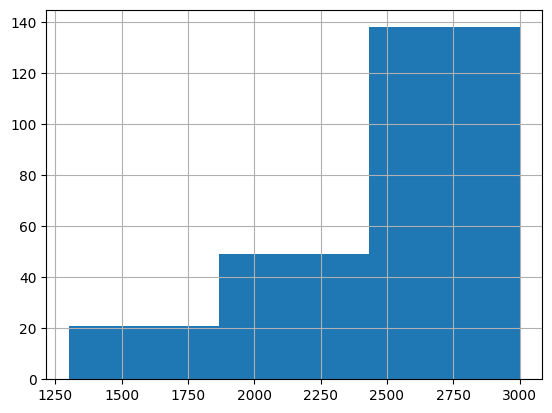

In [97]:
df_aluguel_apartamentos.query(consulta_apartamento)['Valor'].hist(bins=3)

In [98]:
df_aluguel_apartamentos.query(consulta_apartamento).query("Valor >= 2500")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
90,Apartamento,Barra da Tijuca,3,2,1,104,2600.0,1364.0,406.0
97,Apartamento,Barra da Tijuca,3,2,2,85,2500.0,1400.0,190.0
158,Apartamento,Barra da Tijuca,3,2,1,128,3000.0,1384.0,324.0
325,Apartamento,Barra da Tijuca,3,1,1,105,2500.0,1400.0,1500.0
750,Apartamento,Barra da Tijuca,3,2,3,120,2800.0,1280.0,360.0
...,...,...,...,...,...,...,...,...,...
30554,Apartamento,Barra da Tijuca,3,1,1,110,2900.0,720.0,280.0
30696,Apartamento,Barra da Tijuca,3,2,1,92,2850.0,1165.0,273.0
31413,Apartamento,Barra da Tijuca,3,2,1,110,2800.0,1100.0,361.0
31489,Apartamento,Barra da Tijuca,3,2,1,141,3000.0,1425.0,372.0


Faça uma comparação (apartamentos na Barra da Tijuca) dos preços desta base de dados com sites de aluguel da cidade do Rio de Janeiro